In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt

# Data Preprocessing

In [3]:
df = pd.read_csv("../datasets/merged_dataset.csv")

#### Dataset Vizualization

In [12]:
malicious_count = len(df[df['is_malicious']==1])
benign_count = len(df[df['is_malicious']==0])

In [13]:
labels = ["Benign", "Malicious"]
frequency = [benign_count, malicious_count]

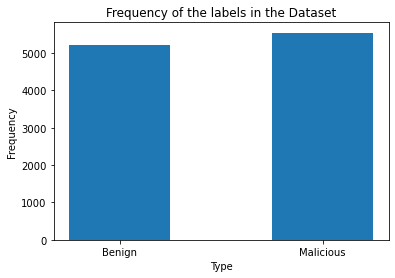

In [14]:
plt.bar(labels, frequency, width=0.5)
plt.xlabel("Type")
plt.ylabel("Frequency")
plt.title("Frequency of the labels in the Dataset")
plt.show()

#### Data Split

In [15]:
from sklearn.utils import shuffle
df = shuffle(df, random_state=42)

In [16]:
X = df.drop(["id", "is_malicious"], axis=1)
y = df["is_malicious"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

#### Normalization

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Model Training

## Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier

rfclf = RandomForestClassifier()

In [19]:
params_rf = {
    "n_estimators": [800, 1200, 2000],
    "max_depth": [500, 600, 700],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5]
}

#### Training

In [ ]:
rf = RandomizedSearchCV(rfclf, params_rf, cv=10, scoring="f1", n_jobs=-1, random_state=42)
rf.fit(X_train, y_train)

#### Results

In [21]:
rf_pred = rf.predict(X_test)

In [22]:
rf_score = f1_score(rf_pred, y_test)
print(classification_report(rf_pred, y_test))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1078
           1       0.92      0.93      0.92      1078

    accuracy                           0.92      2156
   macro avg       0.92      0.92      0.92      2156
weighted avg       0.92      0.92      0.92      2156



## Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier

dtclf = DecisionTreeClassifier()

In [24]:
params_dt = {
    "criterion": ["gini", "entropy"],
    "max_depth": [1000, 1500, 2000, 2500],
    "min_samples_split": [2, 5, 10, 15, 100],
    "min_samples_leaf": [1, 2, 5, 10]
}

#### Training

In [ ]:
dt = RandomizedSearchCV(dtclf, params_dt, cv=10, scoring="f1", n_jobs=-1, random_state=42)
dt.fit(X_train, y_train)

#### Results

In [26]:
dt_pred = dt.predict(X_test)

In [27]:
dt_score = f1_score(dt_pred, y_test)
print(classification_report(dt_pred, y_test))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89      1057
           1       0.89      0.89      0.89      1099

    accuracy                           0.89      2156
   macro avg       0.89      0.89      0.89      2156
weighted avg       0.89      0.89      0.89      2156



## KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knnclf = KNeighborsClassifier()

In [29]:
params_knn = {
    "n_neighbors": range(3,100,2)
}

#### Training

In [ ]:
knn = RandomizedSearchCV(knnclf, params_knn, cv=10, scoring="f1", n_jobs=-1, random_state=42)
knn.fit(X_train, y_train)

#### Results

In [31]:
knn_pred = knn.predict(X_test)

In [32]:
knn_score = f1_score(knn_pred, y_test)
print(classification_report(knn_pred, y_test))

              precision    recall  f1-score   support

           0       0.91      0.88      0.89      1108
           1       0.87      0.91      0.89      1048

    accuracy                           0.89      2156
   macro avg       0.89      0.89      0.89      2156
weighted avg       0.89      0.89      0.89      2156



## MLP

In [33]:
from sklearn.neural_network import MLPClassifier

mlpclf = MLPClassifier()

In [34]:
params_mlp = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

#### Training

In [ ]:
mlp = RandomizedSearchCV(mlpclf, params_mlp, cv=10, scoring="f1", n_jobs=-1, random_state=42)
mlp.fit(X_train, y_train)

#### Results

In [36]:
mlp_pred = mlp.predict(X_test)

In [37]:
mlp_score = f1_score(mlp_pred, y_test)
print(classification_report(mlp_pred, y_test))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1049
           1       0.93      0.92      0.92      1107

    accuracy                           0.92      2156
   macro avg       0.92      0.92      0.92      2156
weighted avg       0.92      0.92      0.92      2156



## SVC

In [38]:
from sklearn.svm import SVC

svclf = SVC()

In [39]:
params_svc = {
    "kernel": ["linear", "rbf", "poly"],
    "gamma": [0.1, 1, 10],
    "C": [0.1, 1, 10],
    "degree": [0, 4]
}

#### Training

In [ ]:
svc = RandomizedSearchCV(svclf, params_svc, cv=10, scoring="f1", n_jobs=-1, random_state=42)
svc.fit(X_train, y_train)

#### Results

In [41]:
svc_pred = svc.predict(X_test)

In [42]:
svc_score = f1_score(svc_pred, y_test)
print(classification_report(svc_pred, y_test))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      1147
           1       0.89      0.96      0.92      1009

    accuracy                           0.93      2156
   macro avg       0.93      0.93      0.93      2156
weighted avg       0.93      0.93      0.93      2156



## Naive-Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB

nbclf = GaussianNB()

In [44]:
params_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

#### Training

In [ ]:
nb = RandomizedSearchCV(nbclf, params_nb, cv=10, scoring="f1", n_jobs=-1, random_state=42)
nb.fit(X_train, y_train)

#### Results

In [46]:
nb_pred = nb.predict(X_test)

In [47]:
nb_score = f1_score(nb_pred, y_test)
print(classification_report(nb_pred, y_test))

              precision    recall  f1-score   support

           0       0.26      0.90      0.41       312
           1       0.97      0.57      0.72      1844

    accuracy                           0.62      2156
   macro avg       0.62      0.74      0.57      2156
weighted avg       0.87      0.62      0.68      2156



# Analysis

In [48]:
scores = [rf_score, dt_score, knn_score, mlp_score, svc_score, nb_score]
labels = ["RF", "DT", "KNN", "MLP", "SVC", "NB"]

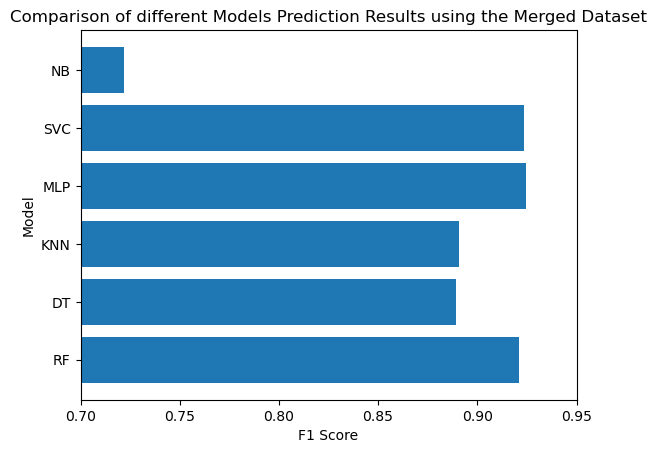

In [49]:
plt.rcdefaults()
fig, ax = plt.subplots()
ax.barh(labels, scores)
plt.xlim([0.70, 0.95])
plt.xlabel("F1 Score")
plt.ylabel("Model")
plt.title("Comparison of different Models Prediction Results using the Merged Dataset")
plt.show()

# Results

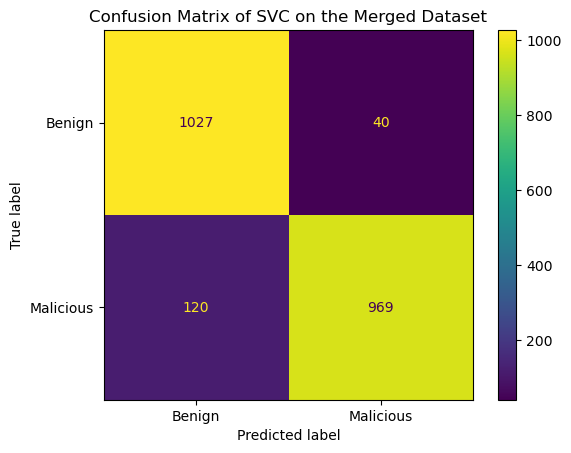

In [51]:
cm = confusion_matrix(y_test, svc_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malicious"])
disp.plot()
plt.title("Confusion Matrix of SVC on the Merged Dataset")
plt.show()

# Bagging Multiple Models

#### Combining Predictions

In [52]:
bagging_pred = []
for i in range(0, len(y_test)):
    bagging_pred.append([rf_pred[i], mlp_pred[i], svc_pred[i], knn_pred[i], dt_pred[i]])

In [53]:
bagging_pred = list(map(lambda pred: 1 if sum(pred) > 2 else 0, bagging_pred))

#### Bagging Results

In [55]:
print(classification_report(bagging_pred, y_test))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      1106
           1       0.92      0.96      0.94      1050

    accuracy                           0.94      2156
   macro avg       0.94      0.94      0.94      2156
weighted avg       0.94      0.94      0.94      2156



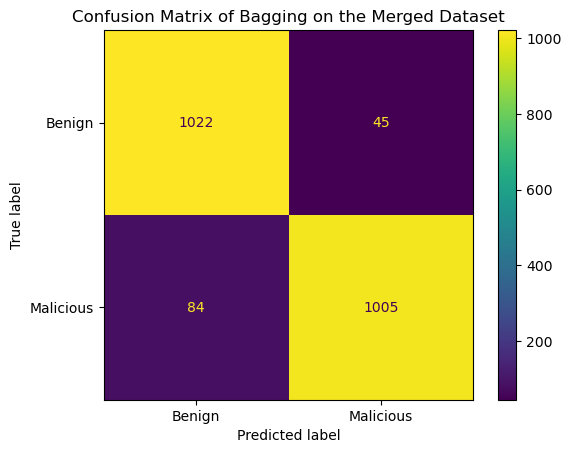

In [59]:
cm = confusion_matrix(y_test, bagging_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Benign", "Malicious"])
disp.plot()
plt.title("Confusion Matrix of Bagging on the Merged Dataset")
plt.show()

#### Comparison between Bagging and SVC

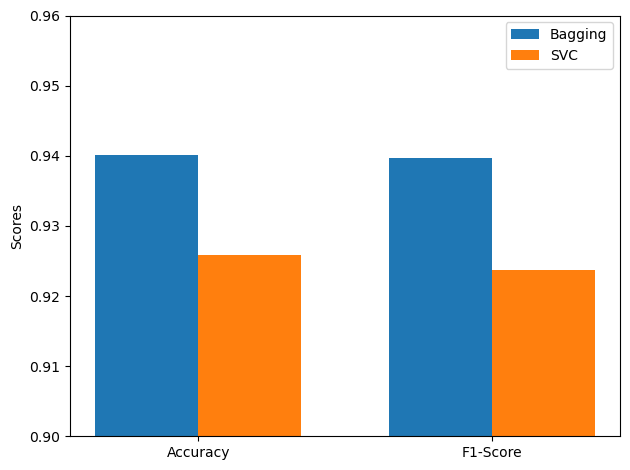

In [60]:
labels = ['Accuracy', 'F1-Score']
acc = [accuracy_score(bagging_pred, y_test), f1_score(bagging_pred, y_test)]
f1 = [accuracy_score(svc_pred, y_test), f1_score(svc_pred, y_test)]

x = np.arange(len(labels))
width = 0.35

plt.rcdefaults()
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, acc, width, label='Bagging')
rects2 = ax.bar(x + width/2, f1, width, label='SVC')

ax.set_ylabel('Scores')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.ylim([0.9, 0.96])
ax.legend()

fig.tight_layout()

plt.show() 